<a href="https://colab.research.google.com/github/isaacperomero/Bioinformatics/blob/main/ProyectoBioinfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo de Investigación - Bioinformática**
Modelo simple de aprendizaje automático (ML) a partir de datos sobre el cáncer de mama

---

## **Instalación e importación de librerías**

In [2]:
! pip install lazypredict

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **Importación del dataset**

In [6]:
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
df_url = 'https://raw.githubusercontent.com/isaacperomero/Bioinformatics/main/breast_cancer_data.csv'
df = pd.read_csv(df_url)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,...,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07,NaN
565,926682,M,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,...,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07,NaN
566,926954,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,...,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08,NaN
567,927241,M,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,...,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12,NaN


# **Tratamiento de la información**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df = df.dropna(axis = 1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,...,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,926682,M,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,...,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,926954,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,...,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,927241,M,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,...,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12


In [12]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

diagnosis
B    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
M    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
dtype: object

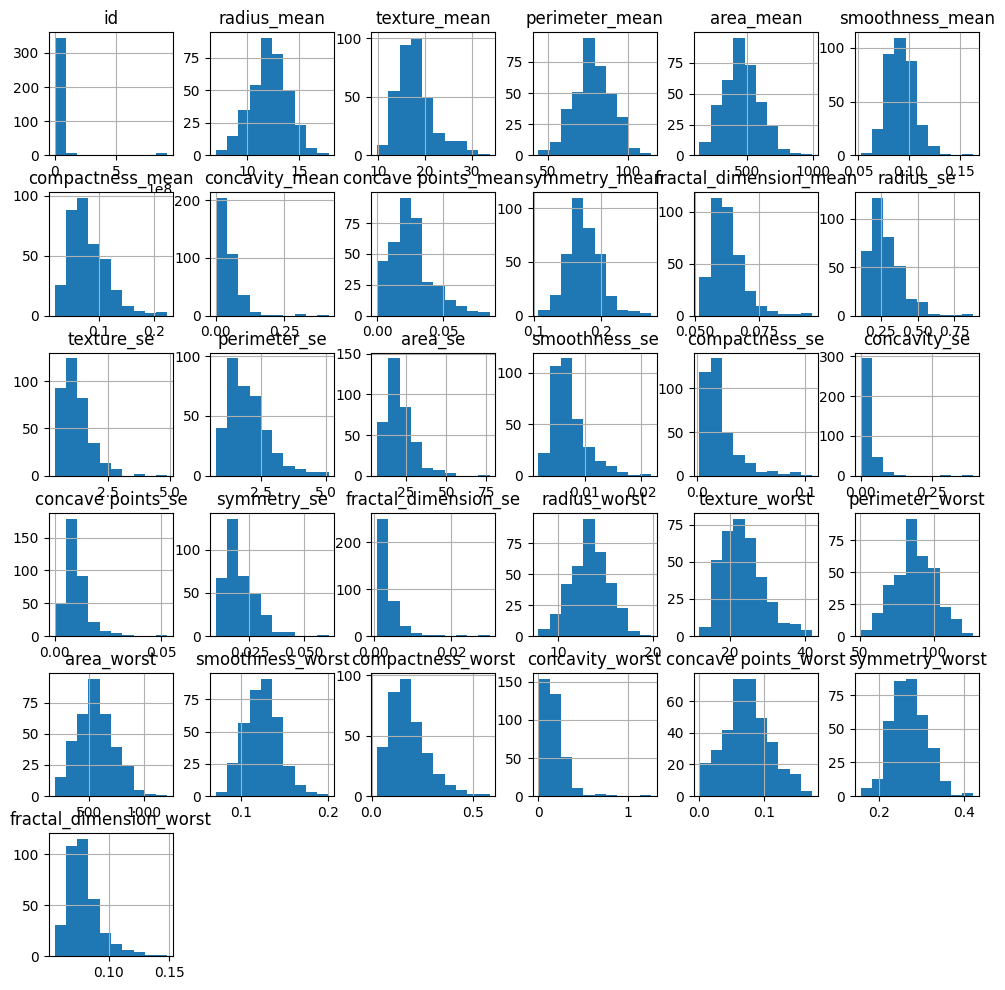

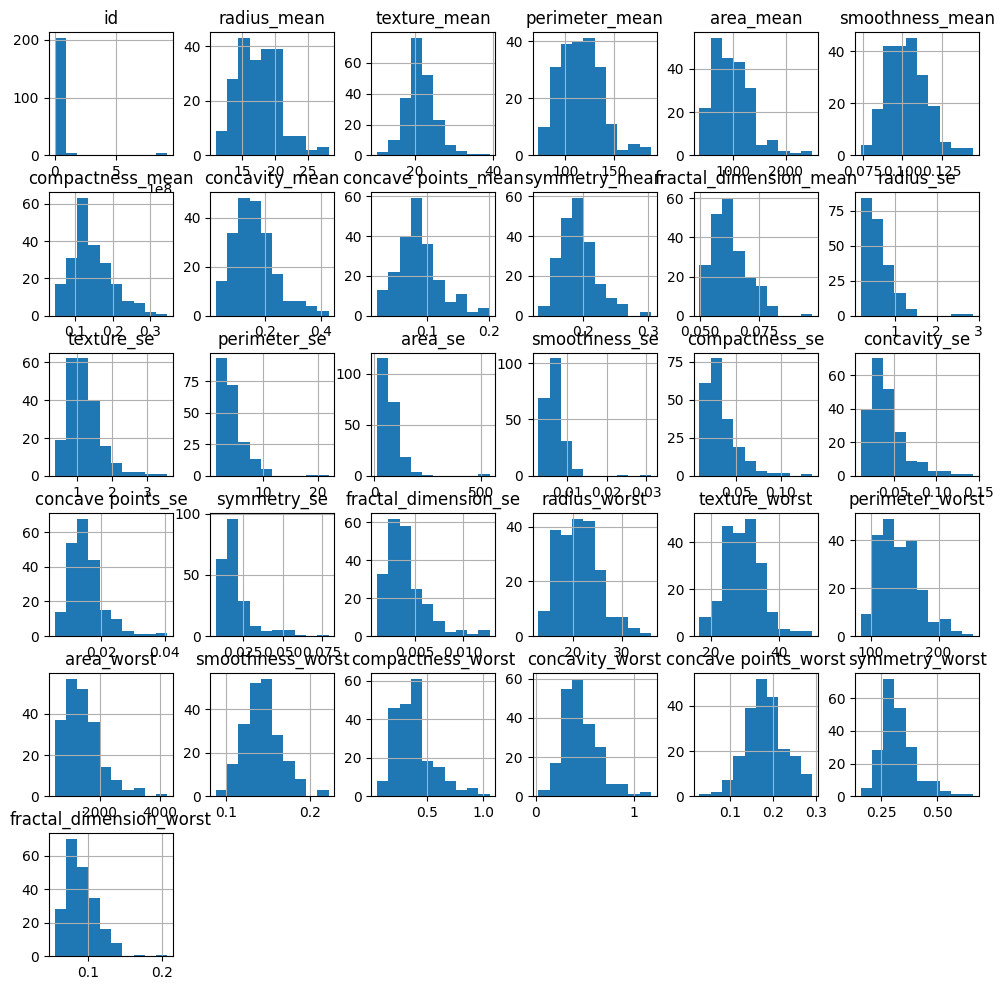

In [13]:
df.groupby('diagnosis').hist(figsize=(12, 12))

In [14]:
# Transformación de valores categóricos a numerales
# B= 0, M= 1
lb = LabelEncoder()
df.iloc[:, 1] = lb.fit_transform(df.iloc[:, 1].values)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,...,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,926682,1,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,...,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,926954,1,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,...,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,927241,1,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,...,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12


In [15]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.00,0.04,0.07,0.10,0.07,0.10,-0.01,0.00,0.05,0.04,...,0.08,0.06,0.08,0.11,0.01,-0.00,0.02,0.04,-0.04,-0.03
diagnosis,0.04,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,...,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.07,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.10,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.07,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.10,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,-0.01,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.00,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.05,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.04,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37


<Axes: >

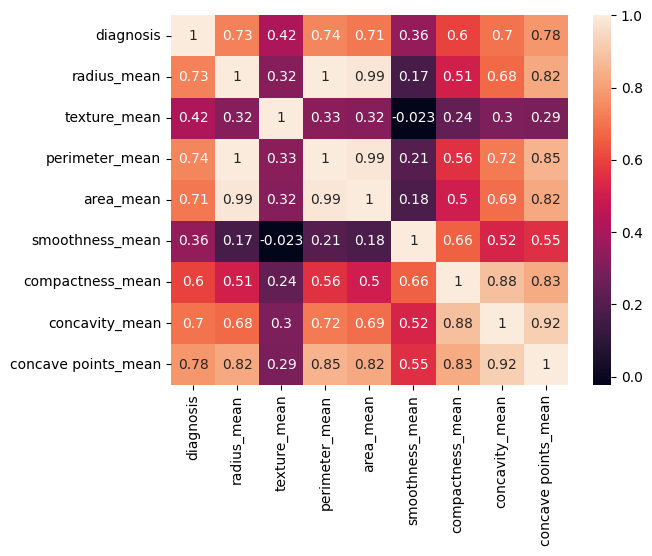

In [16]:
sns.heatmap(df.iloc[:, 1:10].corr(), annot=True)

# **Construcción del modelo de ML**

In [17]:
X = df.iloc[:, 2:32].values
Y = df.iloc[:, 1].values

In [18]:
# División del conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [19]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

**Lazy Predict**

In [20]:
reg = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:07<00:00,  5.54it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4538
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] Start training from score 0.362637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [21]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.90,0.93,0.13,1.30
AdaBoostRegressor,0.90,0.92,0.14,0.32
LGBMRegressor,0.90,0.92,0.14,0.21
ExtraTreesRegressor,0.87,0.91,0.15,0.46
GradientBoostingRegressor,0.86,0.90,0.16,0.84
RandomForestRegressor,0.84,0.88,0.17,0.53
BaggingRegressor,0.81,0.86,0.18,0.19
NuSVR,0.81,0.86,0.19,0.07
SVR,0.80,0.85,0.19,0.03


In [22]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.90,0.93,0.13,1.30
AdaBoostRegressor,0.90,0.92,0.14,0.32
LGBMRegressor,0.90,0.92,0.14,0.21
ExtraTreesRegressor,0.87,0.91,0.15,0.46
GradientBoostingRegressor,0.86,0.90,0.16,0.84
RandomForestRegressor,0.84,0.88,0.17,0.53
BaggingRegressor,0.81,0.86,0.18,0.19
NuSVR,0.81,0.86,0.19,0.07
SVR,0.80,0.85,0.19,0.03




---

